# Comparing the graph properties

- Inputs: activity-based mobility network properties.
    - The properties include at least 11 metrics, # of components, nodes, edges, density, diameter, average degree, and average clustering coeff, size_of_giant_component, diameter_giant_component, ave_distance_giant_component, edge_betweenness_centrality
    
- Outpus: printing results for analysis.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import copy
from scipy.sparse import csr_matrix
import time


Bad key text.latex.unicode in file /home/jtl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key text.latex.preview in file /home/jtl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 125 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/jtl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 157 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')


In [2]:
import sys
sys.path.append("../")
import utils

In [3]:
import importlib
importlib.reload(utils)

<module 'utils' from '../utils.py'>

In [4]:
# read evaluation files
with open("../../data/05_model_outputs/lasso_coefficients.pickle", 'rb') as f:
    lasso_coef = pickle.load(f)

In [5]:
# read the property parameters
with open("../../data/05_model_outputs/network_property_degree_clustering.pickle", 'rb') as f:
    network_property_degree_clustering = pickle.load(f)

with open("../../data/05_model_outputs/network_property_diameters.pickle", 'rb') as f:
    network_property_diameters = pickle.load(f)

with open("../../data/05_model_outputs/network_property_edge_bet_centrality.pickle", 'rb') as f:
    network_property_edge_bet_centrality = pickle.load(f)

with open("../../data/05_model_outputs/network_property_edge_bet_centrality_simpler.pickle", 'rb') as f:
    network_property_edge_bet_centrality_simpler = pickle.load(f)
    
with open("../../data/05_model_outputs/network_property_other_parameters.pickle", 'rb') as f:
    network_property_other_parameters = pickle.load(f)


In [6]:
# read the shapefiles.
with open("../../data/02_intermediate/boston_miami_chicago_ct_shp_dic.pickle", 'rb') as f:
    shp_dic = pickle.load(f)


In [7]:
# read files
with open("../../data/02_intermediate/boston_stays.pickle", 'rb') as f:
    df_boston = pickle.load(f)

with open("../../data/02_intermediate/miami_stays.pickle", 'rb') as f:
    df_miami = pickle.load(f)

with open("../../data/02_intermediate/chicago_stays.pickle", 'rb') as f:
    df_chicago = pickle.load(f)
    

In [8]:
# create the activity counts
# activity counts for the three cities
# boston
activity_counts_boston = np.unique(df_boston.cat, return_counts = True)

# miami
activity_counts_miami = np.unique(df_miami.cat, return_counts = True)

# chicago
activity_counts_chicago = np.unique(df_chicago.cat, return_counts = True)

# convert the counts to df
activity_counts_dic = {}
activity_counts_dic['boston']=activity_counts_boston
activity_counts_dic['miami']=activity_counts_miami
activity_counts_dic['chicago']=activity_counts_chicago

# turn them to dataframes
activity_counts_df_dic = {}
for key_ in activity_counts_dic.keys():
    activity_counts = activity_counts_dic[key_]
    activity_count_df = pd.DataFrame(activity_counts[1],
                                 index = activity_counts[0],
                                 columns = ['count'])
    sorted_activity_count_df = activity_count_df.sort_values('count', ascending=False)
    activity_counts_df_dic[key_] = sorted_activity_count_df


In [9]:
# need to reorganize the structure of the graph parameters.
# print(network_property_degree_clustering['boston']['ATM']['degrees'])
print(network_property_degree_clustering['boston']['ATM']['degree_distributions'])
print(network_property_degree_clustering['boston']['ATM']['average_degree'])
# print(network_property_degree_clustering['boston']['ATM']['clustering'])
print(network_property_degree_clustering['boston']['ATM']['average_clustering'])


(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  32,  33,  34,  35,  37,  38,  39,  40,  42,  43,
        44,  45,  46,  47,  49,  50,  51,  53,  54,  55,  59,  72,  84,
       128, 227, 270]), array([159, 197, 134, 112,  70,  51,  31,  16,  10,   8,   8,   5,   5,
         5,   7,   3,   3,   5,   6,   1,   4,   6,   2,   5,   5,   4,
         1,   3,   2,   7,   1,   2,   2,   2,   1,   1,   2,   1,   1,
         2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1]))
6.8486187845303865
0.19312751731996589


In [10]:
# 
network_property_diameters['boston']['Office'] # diameter for the graph (spatial + mobility) 


1.9560357735750789

In [11]:
# edge betweennecess centrality 1
network_property_edge_bet_centrality['boston']['inc_median_household_2018'][('strong', 'weak_sig_neg')]


{('spatial', 'Italian', 'Brazilian'): (4.90988798752745e-05,
  0.00011468902324290533,
  9.882343085783116e-05),
 ('spatial', 'Residence Hall', 'Latin American'): (0.00022458565992399394,
  0.0005740032990235093,
  0.000381001077884699),
 ('spatial', 'Tech Startup', 'Caribbean'): (9.614840655075186e-05,
  0.0002495983075323691,
  0.00014291645271266538),
 ('spatial', 'Hospital', 'Fried Chicken'): (5.349496610079905e-05,
  0.00019465617313739965,
  6.395696346199216e-05),
 ('spatial', 'Grocery Store', 'Caribbean'): (6.088677214268247e-05,
  0.00011878760016217698,
  8.633763464931991e-05),
 ('spatial', 'Road', 'Laundromat'): (6.780755821001826e-05,
  0.0001394879430019811,
  8.948370708462066e-05),
 ('spatial', 'Salon / Barbershop', 'Caribbean'): (4.714324213718289e-05,
  7.613246424278207e-05,
  6.58241459703407e-05),
 ('spatial', 'Residence Hall', 'Fried Chicken'): (0.00022075568582207109,
  0.0005897393556411182,
  0.0004376327458275497),
 ('spatial', 'Laundry', 'Laundromat'): (0.000

In [12]:
# 
network_property_edge_bet_centrality_simpler['boston']['ATM']


{('spatial', 'ATM'): (0.0002754214292717695, 0.0007504549615181455)}

In [13]:
# 
network_property_other_parameters['boston']['ATM']


{'n_components': 1,
 'n_nodes': 905,
 'n_edges': 3099,
 'density': 0.007575905735099985,
 'sizes_of_components': [905],
 'size_of_giant_component': 905,
 'diameter_giant_component': 6,
 'ave_distance_giant_component': 3.068241822715494}

### Creating a dictionary for the three cities

In [ ]:
for key_ in network_property_edge_bet_centrality_simpler['boston'].keys():
    spatial_centrality, mobility_centrality = network_property_edge_bet_centrality_simpler['boston'][key_][('spatial', key_)]
    mobility_centrality /= spatial_centrality
    print(mobility_centrality)
    normalized_spatial_centrality_list.append(mobility_centrality)


In [59]:
# properties: 
# components, nodes, edges, density, diameter, average degree, and average clustering coeff. (7 parameters)
# size_of_giant_component, diameter_giant_component, ave_distance_giant_component. (3 parameters)
# edge_betweenness_centrality

network_property_dic = {}

column_list = ['n_components', 'n_nodes', 'n_edges', 'density', 'diameter',
               'ave_degree', 'ave_clustering_coeff', 'size_giant_component',
               'diameter_giant_component', 'ave_distance_giant_component', 'edge_betweenness_centrality']
num_cols = len(column_list)

for city in ['boston','chicago','miami']:
    num_rows = len(network_property_other_parameters[city].keys())
    network_property_dic[city] = pd.DataFrame(np.zeros((num_rows, num_cols)), 
                                                  index = list(network_property_other_parameters[city].keys()),
                                                  columns = column_list)

    for activity in network_property_other_parameters[city].keys():
        ###
        network_property_dic[city].loc[activity, 'n_components']=network_property_other_parameters[city][activity]['n_components']
        network_property_dic[city].loc[activity, 'n_nodes']=network_property_other_parameters[city][activity]['n_nodes']
        network_property_dic[city].loc[activity, 'n_edges']=network_property_other_parameters[city][activity]['n_edges']
        network_property_dic[city].loc[activity, 'density']=network_property_other_parameters[city][activity]['density']
        network_property_dic[city].loc[activity, 'size_giant_component']=network_property_other_parameters[city][activity]['size_of_giant_component']
        network_property_dic[city].loc[activity, 'diameter_giant_component']=network_property_other_parameters[city][activity]['diameter_giant_component']
        network_property_dic[city].loc[activity, 'ave_distance_giant_component']=network_property_other_parameters[city][activity]['ave_distance_giant_component']
        ###
        network_property_dic[city].loc[activity, 'diameter']=network_property_diameters[city][activity]
        ###
        network_property_dic[city].loc[activity, 'ave_degree']=network_property_degree_clustering[city][activity]['average_degree']
        network_property_dic[city].loc[activity, 'ave_clustering_coeff']=network_property_degree_clustering[city][activity]['average_clustering']
        ### 
        spatial_centrality, mobility_centrality = network_property_edge_bet_centrality_simpler[city][activity][('spatial', activity)]
        mobility_centrality = mobility_centrality/spatial_centrality
        network_property_dic[city].loc[activity, 'edge_betweenness_centrality']=mobility_centrality

        

In [60]:
network_property_dic['chicago']

,n_components,n_nodes,n_edges,density,diameter,ave_degree,ave_clustering_coeff,size_giant_component,diameter_giant_component,ave_distance_giant_component,edge_betweenness_centrality
ATM,52.0,1729.0,5657.0,0.003787,3.379906,6.543667,0.193183,1678.0,6.0,3.434973,3.205386
Academic Building,7.0,1894.0,13873.0,0.007739,2.550373,14.649419,0.299976,1888.0,6.0,2.566283,2.931379
Accessories,31.0,1830.0,7215.0,0.004311,2.685688,7.885246,0.388231,1800.0,6.0,2.686374,3.864272
Acupuncturist,26.0,1122.0,1792.0,0.002850,3.925502,3.194296,0.100971,1097.0,8.0,3.733869,5.193274
Administrative Building,11.0,1857.0,9652.0,0.005601,2.723700,10.395261,0.250102,1847.0,5.0,2.751851,3.032321
...,...,...,...,...,...,...,...,...,...,...,...
Women's Store,2.0,1909.0,18076.0,0.009925,2.370394,18.937664,0.431373,1908.0,5.0,2.373771,3.646145
Yoga Studio,13.0,1810.0,9187.0,0.005612,3.058783,10.151381,0.165384,1798.0,6.0,3.119472,2.573897
Yogurt,26.0,1633.0,5785.0,0.004341,3.246128,7.085119,0.192523,1608.0,6.0,3.183417,3.012569
Zoo,55.0,822.0,958.0,0.002839,3.786278,2.330900,0.014570,768.0,6.0,3.059400,7.163502


In [61]:
# create the four activity lists
activity_cat_dic = {}
top_K_as_strong_mobility_ties = 50
model_type = 'lasso (no socio-demographics)'

for city in ['boston','chicago','miami']:
    activity_cat_dic[city]={}
    for output_var in ['inc_median_household_2018','property_value_median_2018', 'rent_median_2018']:
        activity_cat_dic[city][output_var]={}

        # parameters
        strong_activity_list = list(activity_counts_df_dic[city].index[:top_K_as_strong_mobility_ties]) # top 50.
        weak_sig_activity_list = list(lasso_coef[city][output_var][model_type].index)
        weak_sig_neg_activities = list(lasso_coef[city][output_var][model_type]['value'].loc[lasso_coef[city][output_var][model_type]['value'] < 0.0].index)
        weak_sig_pos_activities = list(lasso_coef[city][output_var][model_type]['value'].loc[lasso_coef[city][output_var][model_type]['value'] > 0.0].index)
        weak_insig_activity_list = list(set(activity_counts_df_dic[city].index).difference(set(strong_activity_list)).difference(set(weak_sig_activity_list)))

        # activity_list_dic = {}
        activity_cat_dic[city][output_var]['strong']=strong_activity_list
        activity_cat_dic[city][output_var]['weak_sig_neg']=weak_sig_neg_activities
        activity_cat_dic[city][output_var]['weak_sig_pos']=weak_sig_pos_activities
        activity_cat_dic[city][output_var]['weak_insig']=weak_insig_activity_list

# aggregate the activity list for the three output variables.
# the output variable dimension does not seem to matter too much in this analysis.
activity_cat_agg_outputs_dic = {}
for city in ['boston','chicago','miami']:
    activity_cat_agg_outputs_dic[city]={}
    activity_cat_agg_outputs_dic[city]['strong']=list(set(activity_cat_dic[city]['inc_median_household_2018']['strong']).union(set(activity_cat_dic[city]['property_value_median_2018']['strong'])).union(set(activity_cat_dic[city]['rent_median_2018']['strong'])))
    activity_cat_agg_outputs_dic[city]['weak_sig_neg']=list(set(activity_cat_dic[city]['inc_median_household_2018']['weak_sig_neg']).union(set(activity_cat_dic[city]['property_value_median_2018']['weak_sig_neg'])).union(set(activity_cat_dic[city]['rent_median_2018']['weak_sig_neg'])))
    activity_cat_agg_outputs_dic[city]['weak_sig_pos']=list(set(activity_cat_dic[city]['inc_median_household_2018']['weak_sig_pos']).union(set(activity_cat_dic[city]['property_value_median_2018']['weak_sig_pos'])).union(set(activity_cat_dic[city]['rent_median_2018']['weak_sig_pos'])))
    activity_cat_agg_outputs_dic[city]['weak_insig']=list(set(activity_cat_dic[city]['inc_median_household_2018']['weak_insig']).union(set(activity_cat_dic[city]['property_value_median_2018']['weak_insig'])).union(set(activity_cat_dic[city]['rent_median_2018']['weak_insig'])))

        

In [62]:
network_property_list = list(network_property_dic['boston'].columns)
network_property_list

['n_components',
 'n_nodes',
 'n_edges',
 'density',
 'diameter',
 'ave_degree',
 'ave_clustering_coeff',
 'size_giant_component',
 'diameter_giant_component',
 'ave_distance_giant_component',
 'edge_betweenness_centrality']

In [63]:
# Need to compare 4 groups for 10 parameters * 3 output variables * 3 cities. 
# leading dimension: 10 parameters.
# aggregate the three output variables. 
network_properties_in_activity_categories_dic = {}
network_property_list = list(network_property_dic['boston'].columns)

for network_property in network_property_list:
    network_properties_in_activity_categories_dic[network_property]={}
    for city in ['boston','chicago','miami']:
        network_properties_in_activity_categories_dic[network_property][city]=pd.DataFrame([network_property_dic[city].loc[activity_cat_agg_outputs_dic[city]['strong'], network_property].values,
                                                                                            network_property_dic[city].loc[activity_cat_agg_outputs_dic[city]['weak_sig_neg'], network_property].values,
                                                                                            network_property_dic[city].loc[activity_cat_agg_outputs_dic[city]['weak_sig_pos'], network_property].values,
                                                                                            network_property_dic[city].loc[activity_cat_agg_outputs_dic[city]['weak_insig'], network_property].values],
                                                                                            index = ['strong','weak_sig_neg','weak_sig_pos','weak_insig']).T
        
        
        
#         network_properties_in_activity_categories_dic[city][output_var]={}
        
#         # 
#         network_properties_in_activity_categories_dic[city][output_var]['strong']=network_property_dic[city].loc[activity_cat_dic[city][output_var]['strong'], :]
#         network_properties_in_activity_categories_dic[city][output_var]['weak_sig_neg']=network_property_dic[city].loc[activity_cat_dic[city][output_var]['weak_sig_neg'], :]
#         network_properties_in_activity_categories_dic[city][output_var]['weak_sig_pos']=network_property_dic[city].loc[activity_cat_dic[city][output_var]['weak_sig_pos'], :]
#         network_properties_in_activity_categories_dic[city][output_var]['weak_insig']=network_property_dic[city].loc[activity_cat_dic[city][output_var]['weak_insig'], :]


In [64]:
network_property_list

['n_components',
 'n_nodes',
 'n_edges',
 'density',
 'diameter',
 'ave_degree',
 'ave_clustering_coeff',
 'size_giant_component',
 'diameter_giant_component',
 'ave_distance_giant_component',
 'edge_betweenness_centrality']

## Analysis (3 * 10)

- TBD: statistical tests.
- Some writing.

In [65]:
from scipy import stats

#### nodes

It seems that the positive mobility ties have smaller coverage than the negative ones. And the weak ties seem to have a consistent coverage of the census tracts.


In [21]:
network_property = 'n_nodes'

for city in ['boston','chicago','miami']:
# city = 'boston'
    print()
    print(city)
    print(network_properties_in_activity_categories_dic[network_property][city].describe())
    
    print('strong - weak_sig_neg',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['strong'].isna(), 'strong'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg']))
    print('strong - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['strong'].isna(), 'strong'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))
    print('weak_sig_neg - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))
    print('weak_insig - weak_sig_neg',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_insig'].isna(), 'weak_insig'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg']))
    print('weak_insig - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_insig'].isna(), 'weak_insig'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))

# print('chicago')
# print(network_properties_in_activity_categories_dic[network_property]['chicago'].describe())
# print('miami')
# print(network_properties_in_activity_categories_dic[network_property]['miami'].describe())



boston
         strong  weak_sig_neg  weak_sig_pos  weak_insig
count   50.0000      16.00000     22.000000  582.000000
mean   983.1200     748.50000    504.590909  462.003436
std     15.2029     155.13521    277.361318  348.311536
min    897.0000     455.00000     40.000000    1.000000
25%    984.2500     624.75000    295.500000  117.250000
50%    988.0000     716.50000    584.500000  428.500000
75%    989.0000     879.25000    667.250000  819.750000
max    992.0000     987.00000    875.000000  987.000000
strong - weak_sig_neg Ttest_indResult(statistic=10.709382935506703, pvalue=6.611852639024816e-16)
strong - weak_sig_pos Ttest_indResult(statistic=12.26916361944002, pvalue=4.120005833641091e-19)
weak_sig_neg - weak_sig_pos Ttest_indResult(statistic=3.1681682665669246, pvalue=0.0031233117368522243)
weak_insig - weak_sig_neg Ttest_indResult(statistic=-3.2790514062347587, pvalue=0.0011022464714073013)
weak_insig - weak_sig_pos Ttest_indResult(statistic=-0.5665756292931462, pvalue=0.5712

#### node coverage

- It seems hard to differentiate between the positive and negative mobility ties in node coverage. However, the significant mobility ties have much smaller coverage than the strong ties and broader coverage than the insignificant ties.
- It suggests while weak, the important mobilities have more structural meaning (?) than the insignificant mobility ties. In statistical tests, it is hard to show this separately, but if I combine the three cities, we shall see a significant effect.

In [22]:
# create a property as node coverage.
network_properties_in_activity_categories_dic['node_coverage']={}

for city in ['boston','chicago','miami']:
    network_properties_in_activity_categories_dic['node_coverage'][city]=network_properties_in_activity_categories_dic['n_nodes'][city]/shp_dic[city].shape[0]

# analyze
network_property = 'node_coverage'

for city in ['boston','chicago','miami']:
# city = 'boston'
    print()
    print(city)
    print(network_properties_in_activity_categories_dic[network_property][city].describe())
    
    print('strong - weak_sig_neg',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['strong'].isna(), 'strong'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg']))
    print('strong - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['strong'].isna(), 'strong'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))
    print('weak_sig_neg - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))
    print('weak_insig - weak_sig_neg',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_insig'].isna(), 'weak_insig'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg']))
    print('weak_insig - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_insig'].isna(), 'weak_insig'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))



boston
          strong  weak_sig_neg  weak_sig_pos  weak_insig
count  50.000000     16.000000     22.000000  582.000000
mean    0.991048      0.754536      0.508660    0.465729
std     0.015326      0.156386      0.279598    0.351120
min     0.904234      0.458669      0.040323    0.001008
25%     0.992188      0.629788      0.297883    0.118196
50%     0.995968      0.722278      0.589214    0.431956
75%     0.996976      0.886341      0.672631    0.826361
max     1.000000      0.994960      0.882056    0.994960
strong - weak_sig_neg Ttest_indResult(statistic=10.709382935506703, pvalue=6.611852639024816e-16)
strong - weak_sig_pos Ttest_indResult(statistic=12.269163619440018, pvalue=4.1200058336411212e-19)
weak_sig_neg - weak_sig_pos Ttest_indResult(statistic=3.168168266566924, pvalue=0.0031233117368522243)
weak_insig - weak_sig_neg Ttest_indResult(statistic=-3.2790514062347578, pvalue=0.0011022464714073035)
weak_insig - weak_sig_pos Ttest_indResult(statistic=-0.5665756292931458, pva

#### edges
- Significant mobility ties are weak. It is very consistent across all three cities.
- Regarding edges, the significant mobility ties are weak. But the positive mobility ties are even weaker than the negative mobility ties. A much smaller proportion of the mobility ties are positively associated with economic productivity. 
- This differentiator between positive and negative mobility ties is extremely significant, consistent in all three cities. Even with very small sample size, we could see the stat significance in all three cases.


In [23]:
network_property = 'n_edges'

for city in ['boston','chicago','miami']:
# city = 'boston'
    print()
    print(city)
    print(network_properties_in_activity_categories_dic[network_property][city].describe())
    
    print('strong - weak_sig_neg',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['strong'].isna(), 'strong'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg']))
    print('strong - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['strong'].isna(), 'strong'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))
    print('weak_sig_neg - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))
    print('weak_insig - weak_sig_neg',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_insig'].isna(), 'weak_insig'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg']))
    print('weak_insig - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_insig'].isna(), 'weak_insig'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))




boston
             strong  weak_sig_neg  weak_sig_pos    weak_insig
count     50.000000     16.000000     22.000000    582.000000
mean   15107.440000   2866.375000   1119.409091   1439.986254
std     7352.648433   3071.947458   1046.954752   1964.722314
min     3110.000000    791.000000     40.000000      1.000000
25%    10448.250000   1272.750000    374.250000    120.750000
50%    13239.500000   1870.000000   1024.500000    580.500000
75%    18330.500000   2759.500000   1288.250000   2021.000000
max    37681.000000  13257.000000   4561.000000  11472.000000
strong - weak_sig_neg Ttest_indResult(statistic=6.454108582930698, pvalue=1.6706184775388727e-08)
strong - weak_sig_pos Ttest_indResult(statistic=8.84942639467337, pvalue=4.994600977486016e-13)
weak_sig_neg - weak_sig_pos Ttest_indResult(statistic=2.4867844411576234, pvalue=0.017663500149260835)
weak_insig - weak_sig_neg Ttest_indResult(statistic=-2.8141829557051232, pvalue=0.005051582284246804)
weak_insig - weak_sig_pos Ttest_ind

#### density

- A bit difficult to compare because very insignificant weak mobility ties could have density = 1. e.g. two nodes one edge. 

In [24]:
network_property = 'density'

for city in ['boston','chicago','miami']:
# city = 'boston'
    print()
    print(city)
    print(network_properties_in_activity_categories_dic[network_property][city].describe())
    
    print('strong - weak_sig_neg',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['strong'].isna(), 'strong'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg']))
    print('strong - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['strong'].isna(), 'strong'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))
    print('weak_sig_neg - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))
    print('weak_insig - weak_sig_neg',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_insig'].isna(), 'weak_insig'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg']))
    print('weak_insig - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_insig'].isna(), 'weak_insig'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))




boston
          strong  weak_sig_neg  weak_sig_pos  weak_insig
count  50.000000     16.000000     22.000000  582.000000
mean    0.031059      0.008659      0.012965    0.033641
std     0.014828      0.005344      0.014067    0.087496
min     0.007739      0.004836      0.003996    0.000000
25%     0.021691      0.006242      0.006201    0.006330
50%     0.027236      0.007105      0.006529    0.009175
75%     0.037519      0.008994      0.009059    0.019404
max     0.076970      0.027245      0.051282    1.000000
strong - weak_sig_neg Ttest_indResult(statistic=5.894771525452509, pvalue=1.5323743086715669e-07)
strong - weak_sig_pos Ttest_indResult(statistic=4.842894982032091, pvalue=7.39816594359865e-06)
weak_sig_neg - weak_sig_pos Ttest_indResult(statistic=-1.1614202756588008, pvalue=0.2531140625873107)
weak_insig - weak_sig_neg Ttest_indResult(statistic=1.1410992878255592, pvalue=0.2542868962853475)
weak_insig - weak_sig_pos Ttest_indResult(statistic=1.1069821682414833, pvalue=0.268

#### average and median degree

- Negatively significant mobility ties have larger node degrees than the positively significant mobility ties. This is directly related to the number of edges. 

In [25]:
network_property = 'ave_degree'

for city in ['boston','chicago','miami']:
# city = 'boston'
    print()
    print(city)
    print(network_properties_in_activity_categories_dic[network_property][city].describe())
    
    print('strong - weak_sig_neg',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['strong'].isna(), 'strong'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg']))
    print('strong - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['strong'].isna(), 'strong'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))
    print('weak_sig_neg - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))
    print('weak_insig - weak_sig_neg',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_insig'].isna(), 'weak_insig'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg']))
    print('weak_insig - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_insig'].isna(), 'weak_insig'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))



boston
          strong  weak_sig_neg  weak_sig_pos  weak_insig
count  50.000000     16.000000     22.000000  582.000000
mean   30.617368      6.897202      3.724299    4.259546
std    14.760845      5.826037      1.846026    3.470237
min     6.934225      2.978930      2.000000    0.226415
25%    21.279391      3.756960      2.542430    2.123776
50%    26.841347      5.222646      3.397979    2.690608
75%    37.068756      6.528542      3.951277    5.055920
max    76.123232     26.863222     10.425143   23.246201
strong - weak_sig_neg Ttest_indResult(statistic=6.246766487688487, pvalue=3.8171701530012874e-08)
strong - weak_sig_pos Ttest_indResult(statistic=8.483196365093406, pvalue=2.3540248119738518e-12)
weak_sig_neg - weak_sig_pos Ttest_indResult(statistic=2.4044173083044162, pvalue=0.021468003862119583)
weak_insig - weak_sig_neg Ttest_indResult(statistic=-2.9329984713111923, pvalue=0.0034860447447636013)
weak_insig - weak_sig_pos Ttest_indResult(statistic=0.719200482001734, pvalue

#### average clustering coefficients. 

- The clustering coefficients of the weak mobility ties are closer to the individual-based social networks. In Jure's MSN (2008) benchmark, the clustering coefficient is 0.137. Our significant mobility ties are much closer to this number than the strong mobility ties.


In [26]:
network_property = 'ave_clustering_coeff'

for city in ['boston','chicago','miami']:
# city = 'boston'
    print()
    print(city)
    print(network_properties_in_activity_categories_dic[network_property][city].describe())
    
    print('strong - weak_sig_neg',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['strong'].isna(), 'strong'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg']))
    print('strong - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['strong'].isna(), 'strong'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))
    print('weak_sig_neg - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))
    print('weak_insig - weak_sig_neg',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_insig'].isna(), 'weak_insig'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg']))
    print('weak_insig - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_insig'].isna(), 'weak_insig'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))



boston
          strong  weak_sig_neg  weak_sig_pos  weak_insig
count  50.000000     16.000000     22.000000  582.000000
mean    0.284888      0.182716      0.156202    0.105742
std     0.089696      0.077609      0.125755    0.106317
min     0.131850      0.075573      0.000000    0.000000
25%     0.228546      0.131448      0.072211    0.011423
50%     0.270336      0.176929      0.135262    0.080465
75%     0.337509      0.211261      0.201440    0.169344
max     0.559299      0.346560      0.549959    0.549959
strong - weak_sig_neg Ttest_indResult(statistic=4.088049319901323, pvalue=0.0001237227909958031)
strong - weak_sig_pos Ttest_indResult(statistic=4.9379202186146305, pvalue=5.164032233478484e-06)
weak_sig_neg - weak_sig_pos Ttest_indResult(statistic=0.7449334944229816, pvalue=0.4611477406723109)
weak_insig - weak_sig_neg Ttest_indResult(statistic=-2.8739565368417685, pvalue=0.004198178502841806)
weak_insig - weak_sig_pos Ttest_indResult(statistic=-2.17018986794138, pvalue=0.0

#### number of components

- Somehow I sense that the weak place-based mobility ties resemble the structure of a individual-based social network, in terms of the number of components, size distributiosn of the components, diameters, clustering coefficients, and others.
- For example, the weak mobility networks have a gaint component associated with many scattered nodes, which is similar to the MSN network, while the strong mobility networks are not. 


In [27]:
network_property = 'n_components'

for city in ['boston','chicago','miami']:
# city = 'boston'
    print()
    print(city)
    print(network_properties_in_activity_categories_dic[network_property][city].describe())
    
    print('strong - weak_sig_neg',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['strong'].isna(), 'strong'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg']))
    print('strong - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['strong'].isna(), 'strong'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))
    print('weak_sig_neg - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))
    print('weak_insig - weak_sig_neg',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_insig'].isna(), 'weak_insig'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg']))
    print('weak_insig - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_insig'].isna(), 'weak_insig'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))




boston
          strong  weak_sig_neg  weak_sig_pos  weak_insig
count  50.000000      16.00000     22.000000  582.000000
mean    1.140000       4.37500      3.500000    3.013746
std     0.639196      11.92127      8.267838    8.153000
min     1.000000       1.00000      1.000000    1.000000
25%     1.000000       1.00000      1.000000    1.000000
50%     1.000000       1.00000      1.000000    1.000000
75%     1.000000       2.00000      2.000000    3.000000
max     5.000000      49.00000     40.000000  142.000000
strong - weak_sig_neg Ttest_indResult(statistic=-1.9424031495015468, pvalue=0.05649120063782898)
strong - weak_sig_pos Ttest_indResult(statistic=-2.022935466772827, pvalue=0.046900781167958566)
weak_sig_neg - weak_sig_pos Ttest_indResult(statistic=0.26752973756274956, pvalue=0.7905881339074615)
weak_insig - weak_sig_neg Ttest_indResult(statistic=-0.6496220221163947, pvalue=0.5161866853287991)
weak_insig - weak_sig_pos Ttest_indResult(statistic=-0.27446411946922616, pvalue=0.

In [28]:
network_property = 'size_giant_component'

for city in ['boston','chicago','miami']:
# city = 'boston'
    print()
    print(city)
    print(network_properties_in_activity_categories_dic[network_property][city].describe())
    
    print('strong - weak_sig_neg',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['strong'].isna(), 'strong'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg']))
    print('strong - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['strong'].isna(), 'strong'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))
    print('weak_sig_neg - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))
    print('weak_insig - weak_sig_neg',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_insig'].isna(), 'weak_insig'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg']))
    print('weak_insig - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_insig'].isna(), 'weak_insig'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))




boston
           strong  weak_sig_neg  weak_sig_pos  weak_insig
count   50.000000     16.000000     22.000000  582.000000
mean   982.980000    744.875000    501.000000  456.058419
std     15.714922    158.954029    277.323088  352.203905
min    893.000000    450.000000     40.000000    1.000000
25%    984.250000    624.250000    294.500000   95.250000
50%    988.000000    716.500000    584.500000  422.000000
75%    989.000000    879.250000    658.500000  819.750000
max    992.000000    987.000000    872.000000  987.000000
strong - weak_sig_neg Ttest_indResult(statistic=10.604481422860449, pvalue=9.926162589547873e-16)
strong - weak_sig_pos Ttest_indResult(statistic=12.35638798902529, pvalue=2.928412085502886e-19)
weak_sig_neg - weak_sig_pos Ttest_indResult(statistic=3.1537577383438755, pvalue=0.003246241051912633)
weak_insig - weak_sig_neg Ttest_indResult(statistic=-3.2688501583564284, pvalue=0.0011420290418023766)
weak_insig - weak_sig_pos Ttest_indResult(statistic=-0.59143407222742

In [29]:
network_property = 'diameter'
# Note this diameter computation includes the spatial network!

for city in ['boston','chicago','miami']:
# city = 'boston'
    print()
    print(city)
    print(network_properties_in_activity_categories_dic[network_property][city].describe())
    
    print('strong - weak_sig_neg',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['strong'].isna(), 'strong'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg']))
    print('strong - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['strong'].isna(), 'strong'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))
    print('weak_sig_neg - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))
    print('weak_insig - weak_sig_neg',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_insig'].isna(), 'weak_insig'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg']))
    print('weak_insig - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_insig'].isna(), 'weak_insig'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))



boston
          strong  weak_sig_neg  weak_sig_pos  weak_insig
count  50.000000     16.000000     22.000000  582.000000
mean    2.358012      3.594958      4.625872    5.262160
std     0.252608      0.563996      2.237575    2.687974
min     1.956036      2.476354      2.586211    2.100752
25%     2.168316      3.297520      3.192107    3.296315
50%     2.288616      3.568552      3.845346    4.303423
75%     2.493181      3.926862      4.721534    6.200339
max     3.010363      4.606684     10.934098   13.718757
strong - weak_sig_neg Ttest_indResult(statistic=-12.258920109914218, pvalue=1.8954286902332005e-18)
strong - weak_sig_pos Ttest_indResult(statistic=-7.127623827775031, pvalue=7.306103129756899e-10)
weak_sig_neg - weak_sig_pos Ttest_indResult(statistic=-1.7956806052510106, pvalue=0.08094308850703832)
weak_insig - weak_sig_neg Ttest_indResult(statistic=2.4775501724600852, pvalue=0.013504851200498406)
weak_insig - weak_sig_pos Ttest_indResult(statistic=1.095773969667169, pvalue

In [30]:
network_property = 'diameter_giant_component'

for city in ['boston','chicago','miami']:
# city = 'boston'
    print()
    print(city)
    print(network_properties_in_activity_categories_dic[network_property][city].describe())
    
    print('strong - weak_sig_neg',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['strong'].isna(), 'strong'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg']))
    print('strong - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['strong'].isna(), 'strong'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))
    print('weak_sig_neg - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))
    print('weak_insig - weak_sig_neg',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_insig'].isna(), 'weak_insig'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg']))
    print('weak_insig - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_insig'].isna(), 'weak_insig'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))




boston
          strong  weak_sig_neg  weak_sig_pos  weak_insig
count  50.000000     16.000000     22.000000  582.000000
mean    4.640000      7.250000      6.363636    6.113402
std     0.802038      1.437591      1.839913    2.500436
min     4.000000      5.000000      2.000000    0.000000
25%     4.000000      6.000000      6.000000    5.000000
50%     4.000000      7.000000      6.500000    6.000000
75%     5.000000      8.250000      7.750000    8.000000
max     7.000000     10.000000      9.000000   14.000000
strong - weak_sig_neg Ttest_indResult(statistic=-9.193778479440194, pvalue=2.5991391077361846e-13)
strong - weak_sig_pos Ttest_indResult(statistic=-5.564523675627772, pvalue=4.51213563789634e-07)
weak_sig_neg - weak_sig_pos Ttest_indResult(statistic=1.6019508189690048, pvalue=0.11790612618498549)
weak_insig - weak_sig_neg Ttest_indResult(statistic=-1.8090554170656956, pvalue=0.07094613648833388)
weak_insig - weak_sig_pos Ttest_indResult(statistic=-0.4645014131933197, pvalue=

In [31]:
network_property = 'ave_distance_giant_component'

for city in ['boston','chicago','miami']:
# city = 'boston'
    print()
    print(city)
    print(network_properties_in_activity_categories_dic[network_property][city].describe())
    
    print('strong - weak_sig_neg',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['strong'].isna(), 'strong'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg']))
    print('strong - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['strong'].isna(), 'strong'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))
    print('weak_sig_neg - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))
    print('weak_insig - weak_sig_neg',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_insig'].isna(), 'weak_insig'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg']))
    print('weak_insig - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_insig'].isna(), 'weak_insig'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))




boston
          strong  weak_sig_neg  weak_sig_pos  weak_insig
count  50.000000     16.000000     22.000000  582.000000
mean    2.381033      3.548761      3.114665    3.151492
std     0.279128      0.547624      0.630643    0.885930
min     1.956851      2.507311      1.950000    0.000000
25%     2.174983      3.209953      2.728719    2.597096
50%     2.295348      3.542625      3.239564    3.192543
75%     2.527667      3.834133      3.463452    3.730587
max     3.143995      4.605128      4.042228    6.134101
strong - weak_sig_neg Ttest_indResult(statistic=-11.27833138402407, pvalue=7.455783335235575e-17)
strong - weak_sig_pos Ttest_indResult(statistic=-6.877311548631304, pvalue=2.0887231528538273e-09)
weak_sig_neg - weak_sig_pos Ttest_indResult(statistic=2.211360215447156, pvalue=0.03344728477580611)
weak_insig - weak_sig_neg Ttest_indResult(statistic=-1.7834462894245988, pvalue=0.07502244423658301)
weak_insig - weak_sig_pos Ttest_indResult(statistic=0.19305635432023377, pvalue=

#### edge betweenness centrality

- The weak mobility ties play a more important structural role than the strong mobility ties based on the edge betweenness centrality metric.
- However, it could be a natural result of the quantity of the mobility - weaker ties are more likely to be structurally important. 
- I am wondering how to resolve this issue. 

In [66]:
network_property = 'edge_betweenness_centrality'

for city in ['boston','chicago','miami']:
# city = 'boston'
    print()
    print(city)
    print(network_properties_in_activity_categories_dic[network_property][city].describe())
    
    print('strong - weak_sig_neg',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['strong'].isna(), 'strong'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg']))
    print('strong - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['strong'].isna(), 'strong'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))
    print('weak_sig_neg - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))
    print('weak_insig - weak_sig_neg',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_insig'].isna(), 'weak_insig'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_neg'].isna(), 'weak_sig_neg']))
    print('weak_insig - weak_sig_pos',stats.ttest_ind(network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_insig'].isna(), 'weak_insig'], 
                          network_properties_in_activity_categories_dic[network_property][city].loc[~network_properties_in_activity_categories_dic[network_property][city]['weak_sig_pos'].isna(), 'weak_sig_pos']))




boston
          strong  weak_sig_neg  weak_sig_pos  weak_insig
count  50.000000     16.000000     22.000000  581.000000
mean    2.224844      3.172663      5.791756    7.838554
std     0.539924      0.769415      3.365839    6.647108
min     1.476966      1.634014      1.969296    0.379672
25%     1.828212      2.678374      3.638093    3.254770
50%     2.108507      3.068286      4.643444    5.478375
75%     2.427810      3.601465      6.744719   10.233820
max     3.642681      4.398704     14.512485   55.700223
strong - weak_sig_neg Ttest_indResult(statistic=-5.485020476169384, pvalue=7.528911784978724e-07)
strong - weak_sig_pos Ttest_indResult(statistic=-7.345258561367069, pvalue=2.920164613396913e-10)
weak_sig_neg - weak_sig_pos Ttest_indResult(statistic=-3.0445372433773064, pvalue=0.004338704167413825)
weak_insig - weak_sig_neg Ttest_indResult(statistic=2.804994320633276, pvalue=0.005196171420421061)
weak_insig - weak_sig_pos Ttest_indResult(statistic=1.4364798838176625, pvalue=

### Degree distributions 

In [82]:
city = 'boston'

In [74]:
print(activity_cat_agg_outputs_dic[city]['strong'])

['Road', 'Bank', 'Medical', 'Chinese', 'Park', 'Department Store', 'Pool', 'Residence Hall', 'Auto Dealer', 'Grocery Store', 'Convenience Store', 'Donuts', "Doctor's Office", 'Pizza', 'Hospital', 'Nail Salon', 'School', 'Gas Station', 'High School', 'Coworking Space', 'Neighborhood', 'Fast Food', 'Bus', 'Liquor Store', 'Church', 'Sandwiches', 'Automotive', 'Coffee Shop', 'Café', 'Tech Startup', 'Playground', 'American', 'Supermarket', 'Big Box Store', 'Shop', 'Gym / Fitness', 'Pharmacy', 'Office', 'Salon / Barbershop', 'Laundry', 'Hardware', 'Residential', "Dentist's Office", 'Italian', 'Gym', 'Hotel', 'Other Outdoors', 'Building', 'Entertainment', 'Bar']


In [75]:
print(activity_cat_agg_outputs_dic[city]['weak_sig_neg'])

['Discount Store', 'Fried Chicken', 'Convenience Store', 'Tattoo', 'Pet Service', 'Laundromat', 'Thrift / Vintage', 'Latin American', 'Brazilian', 'Caribbean', 'Car Washes', 'Video Games', 'Strip Club', 'Storage', 'Spanish', 'Hot Dogs']


In [76]:
print(activity_cat_agg_outputs_dic[city]['weak_sig_pos'])

['Bagels', 'Engineering', 'Food Stand', 'Science Museum', 'Gastropub', 'Tennis Court', 'Football', 'Fishing Store', 'Ski Area', 'Skating Rink', 'Art Museum', 'Peking Duck', 'French', 'Locksmith', 'University', 'Synagogue', 'Cupcakes', 'Sorority House', 'Indian Chinese', 'Noodles', 'Cycle Studio', 'Salad']


In [77]:
print(activity_cat_agg_outputs_dic[city]['weak_insig'])

['Advertising Agency', 'Toll Plaza', 'Outdoor Supplies', 'Terminal', 'Kingdom Hall', 'Flower Shop', 'Outdoors & Recreation', 'Gaming Cafe', 'Video Store', 'Tex-Mex', 'Jewelry', 'Funeral Home', 'Pet Service', 'EV Charging', 'Nursery School', 'Lottery', 'Australian', 'Light Rail', 'Costume Shop', 'Community College', 'College Bookstore', 'Auto Garage', 'Food Truck', 'Arepas', 'Event Space', 'Temple', 'Outlet Store', 'Billiards', 'Bath House', 'Weight Loss Center', 'Vietnamese', 'Korean', 'Check Cashing Service', 'Shipping Store', 'Restaurant', 'TV Station', 'Theme Restaurant', 'Empanada', 'Pawn Shop', 'Dongbei', 'Police Station', 'Concert Hall', 'Flight School', 'Food Court', 'Poutine Place', 'Middle Eastern', 'Tram', 'Prayer Room', 'Farm', 'Dive Bar', 'Music Festival', 'Gate', 'Technology', 'Deli / Bodega', 'Colombian', 'Strip Club', 'Bowling Alley', 'Racetrack', 'Salad', 'Toll Booth', 'Surf Spot', 'Hotpot', 'Karaoke', 'Food Stand', 'Chocolate Shop', 'Travel', 'Desserts', 'Prison', 'ATM

In [68]:
print(network_property_degree_clustering['boston']['ATM']['degree_distributions'])

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  32,  33,  34,  35,  37,  38,  39,  40,  42,  43,
        44,  45,  46,  47,  49,  50,  51,  53,  54,  55,  59,  72,  84,
       128, 227, 270]), array([159, 197, 134, 112,  70,  51,  31,  16,  10,   8,   8,   5,   5,
         5,   7,   3,   3,   5,   6,   1,   4,   6,   2,   5,   5,   4,
         1,   3,   2,   7,   1,   2,   2,   2,   1,   1,   2,   1,   1,
         2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1]))


#### Wait - does it look like the weak ties have more power-law distributions?

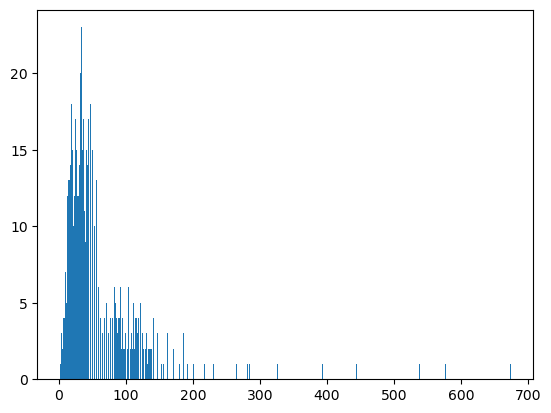

In [78]:
# strong
activity = 'American'
node_degrees=network_property_degree_clustering['boston'][activity]['degree_distributions'][0]
degree_counts=network_property_degree_clustering['boston'][activity]['degree_distributions'][1]
plt.bar(node_degrees, degree_counts)
plt.show()


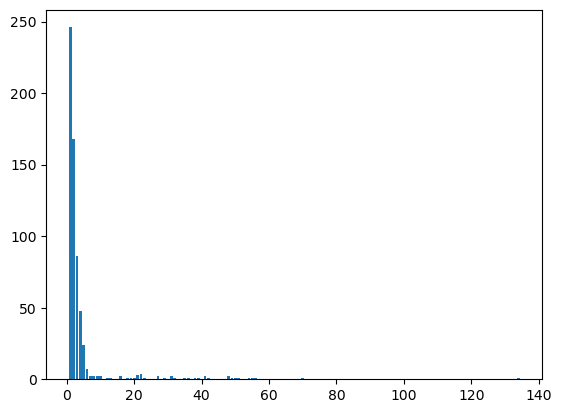

In [79]:
# weak negative
activity = 'Fried Chicken'
node_degrees=network_property_degree_clustering['boston'][activity]['degree_distributions'][0]
degree_counts=network_property_degree_clustering['boston'][activity]['degree_distributions'][1]
plt.bar(node_degrees, degree_counts)
plt.show()


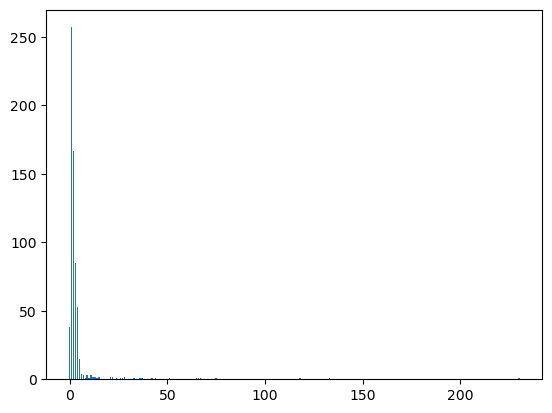

In [80]:
# weak positive
activity = 'French'
node_degrees=network_property_degree_clustering['boston'][activity]['degree_distributions'][0]
degree_counts=network_property_degree_clustering['boston'][activity]['degree_distributions'][1]
plt.bar(node_degrees, degree_counts)
plt.show()


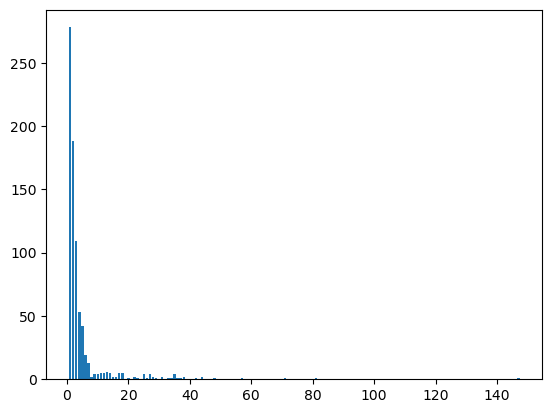

In [81]:
# weak insig
activity = 'Frat House'
node_degrees=network_property_degree_clustering['boston'][activity]['degree_distributions'][0]
degree_counts=network_property_degree_clustering['boston'][activity]['degree_distributions'][1]
plt.bar(node_degrees, degree_counts)
plt.show()
